# Bike Sharing Assignment :

## Problem Statement :
BoomBikes, a US-based bike-sharing service, has faced a decline in revenue due to the COVID-19 pandemic. To recover, the company aims to analyze the demand for shared bikes after lockdown restrictions ease. They have hired a consulting firm to identify key factors influencing bike demand in the American market.

The company seeks to:

Determine significant variables affecting bike demand.
Assess how well these factors predict demand.
A comprehensive dataset has been collected, incorporating daily bike demand trends influenced by meteorological conditions and lifestyle factors. The insights from this analysis will help BoomBikes strategize effectively and gain a competitive edge in the market.

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1 : Reading and understanding the Data :

In [1]:
# importing the libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the shape 
df.shape

(730, 16)

In [4]:
# Checking the data type and shape of data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking the null values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Checking the duplicates 
df.duplicated().sum()

0

In [7]:
# Checking the stat data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# chekcing the columns name
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# deciding which columns need to deal with
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**here we need to deal with the following columns:**
1. instant - we need to drop it beacuase it is nothing other than the row number
2. dteday - we already had the columns like season yr mnth weekday so we will not need that columns
3. casual , registered - we had cnt which is nothing but the sum of the two columns that is casul and regostered 
4. 'season', 'mnth', 'weathersit', 'weekday' - we need to conver them into the categories by using mao method and then need to create there dummies for further analysis

## Step 2 : Data Cleaning :

In [10]:
df = df.drop(columns = ['instant','dteday','casual','registered'], axis = 1 )
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Now we will deal with the following columns with the help of meta data we had** 
1. season - season (1:spring, 2:summer, 3:fall, 4:winter)
2. mnth - month ( 1 to 12)
3. weekday - day of the week
4. weathersit - 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
		      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
		      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
		      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>

In [11]:
# lets check the unique values from the above columns :
print(df['season'].unique())
print(df['mnth'].unique())
print(df['weekday'].unique())
print(df['weathersit'].unique())

[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[6 0 1 2 3 4 5]
[2 1 3]


In [12]:
# Mapping the categorical values to the respected columns :
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth'] = df['mnth'].map({1:'jan', 2:'feb', 3:'march', 4:'april', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec' })
df['weekday'] = df['weekday'].map({0:"Sun" ,1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'})
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Cloudy',3:'Light_snow_rain',4:'Heavy_snow_rain'})

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# We can also map the holiday is there or not and also same with the working day or not 
print(df['holiday'].unique())
print(df['workingday'].unique())

[0 1]
[0 1]


In [15]:
df['holiday'] = df['holiday'].map({0:'No',1:'Yes'})
df['workingday'] = df['workingday'].map({0:'No', 1:'Workingday'})
df['yr'] = df['yr'].map({0:'2018', 1:'2019'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,No,Sat,No,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,No,Sun,No,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,No,Mon,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,No,Tues,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,No,Wed,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# Now we will scale the numerical data set
df.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [17]:
# Creating list of the columns that we should scale :
num = ['temp','atemp','hum','windspeed','cnt']

## Step 3 : Bivariate Analysis :

**Our target variable is cnt so will xill see the graph of categorical data with compare to the cnt**

In [18]:
## bar plot of object data types with the cnt
object = df.select_dtypes(include = 'object' )

In [19]:
# importing the libraries for the visualisation
import matplotlib.pyplot as plt
import seaborn as sns 

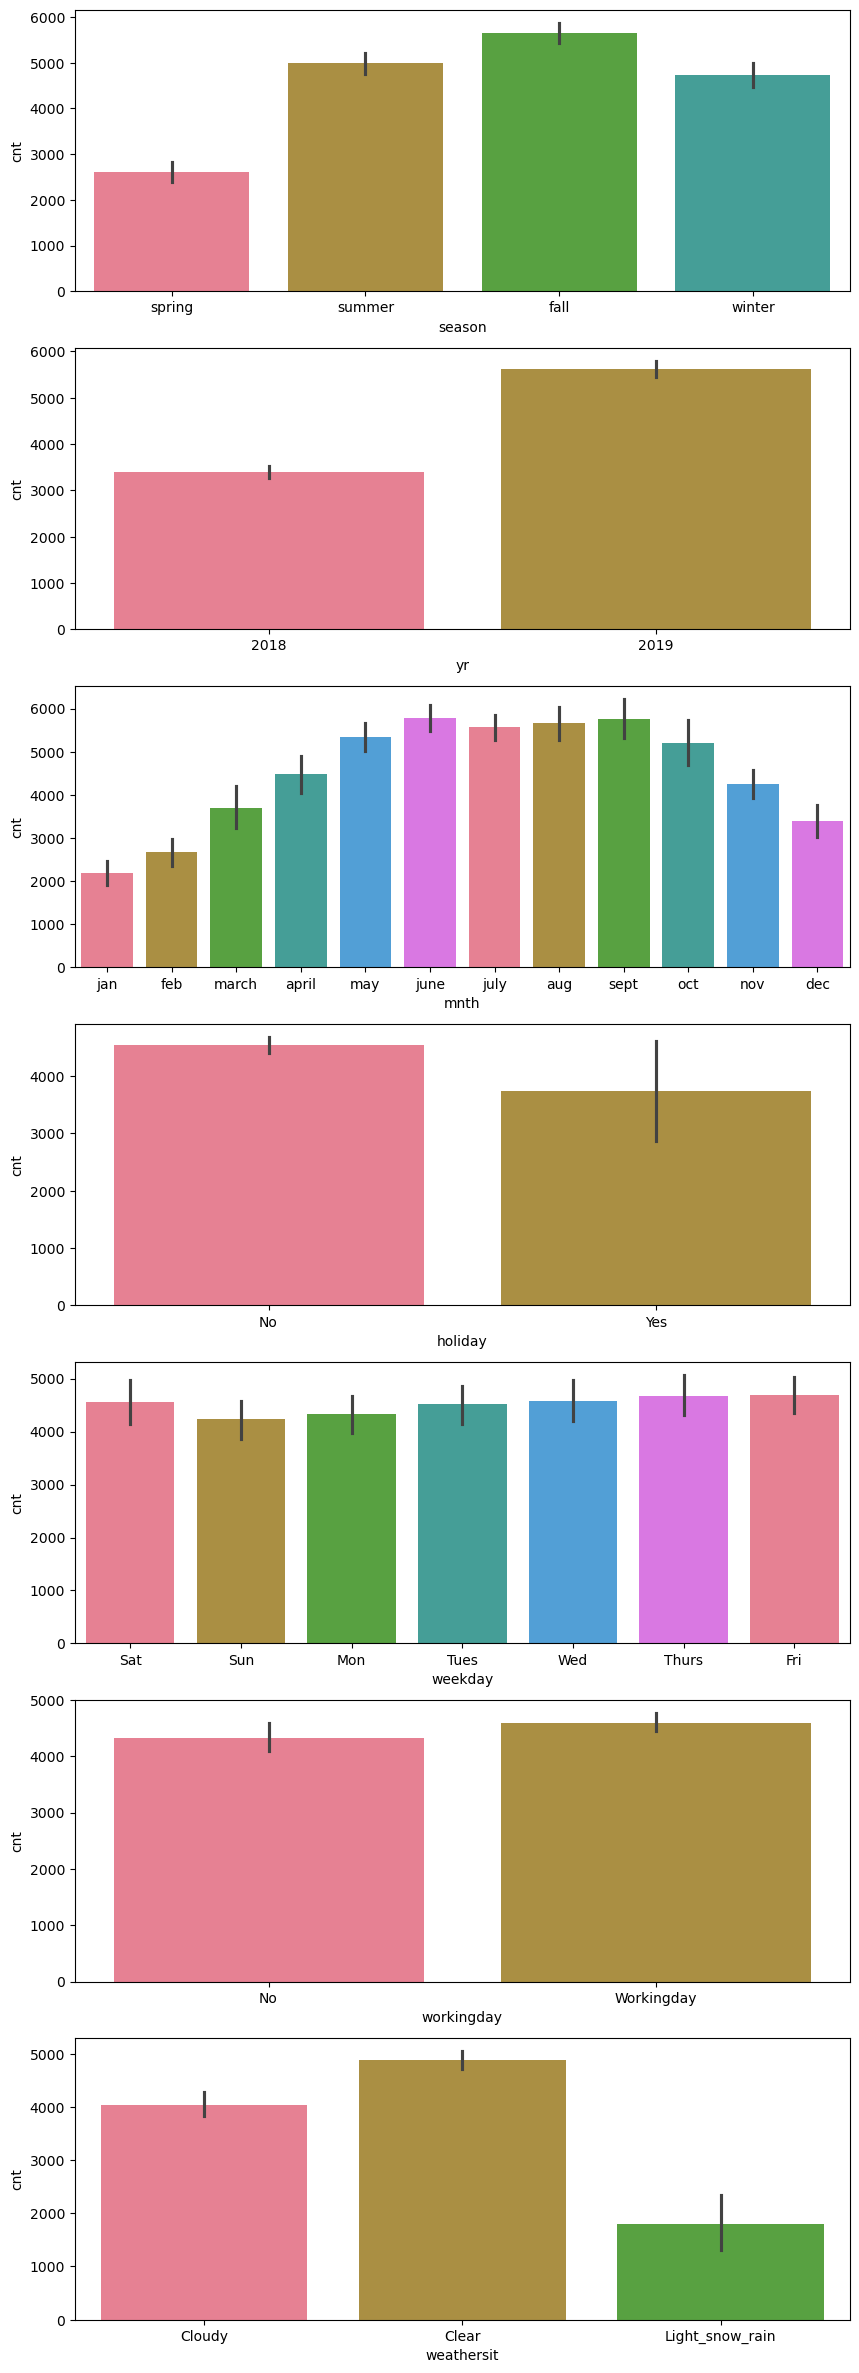

In [20]:
import warnings
warnings.filterwarnings('ignore')
colors = sns.color_palette("husl")
plt.figure(figsize = (10,30))
plt.subplot(7,1,1)
sns.barplot(data = df , x = 'season', y= 'cnt', palette=colors)
plt.subplot(7,1,2)
sns.barplot(data = df , x = 'yr', y= 'cnt',palette=colors)
plt.subplot(7,1,3)
sns.barplot(data = df , x = 'mnth', y= 'cnt',palette=colors)
plt.subplot(7,1,4)
sns.barplot(data = df , x = 'holiday', y= 'cnt',palette=colors)
plt.subplot(7,1,5)
sns.barplot(data = df , x = 'weekday', y= 'cnt',palette=colors)
plt.subplot(7,1,6)
sns.barplot(data = df , x = 'workingday', y= 'cnt',palette=colors)
plt.subplot(7,1,7)
sns.barplot(data = df , x = 'weathersit', y= 'cnt',palette=colors)
plt.show()

'Season' - fall season has the most count of people using boom bikes. Spring season has the least

'Mnth' - Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year.

'Weekday' - Sunday has the least users and the users increases from monday to friday.

'weathersit' - more people tend to use bikes when the weather is ‘clear’.

'Workingday' - Booking seemed to be almost equal either on working day or non-working day.

'Holiday' - Bikes are more used when there is no holiday.

'Yr' - 2019 attracted more number of booking from the previous year.

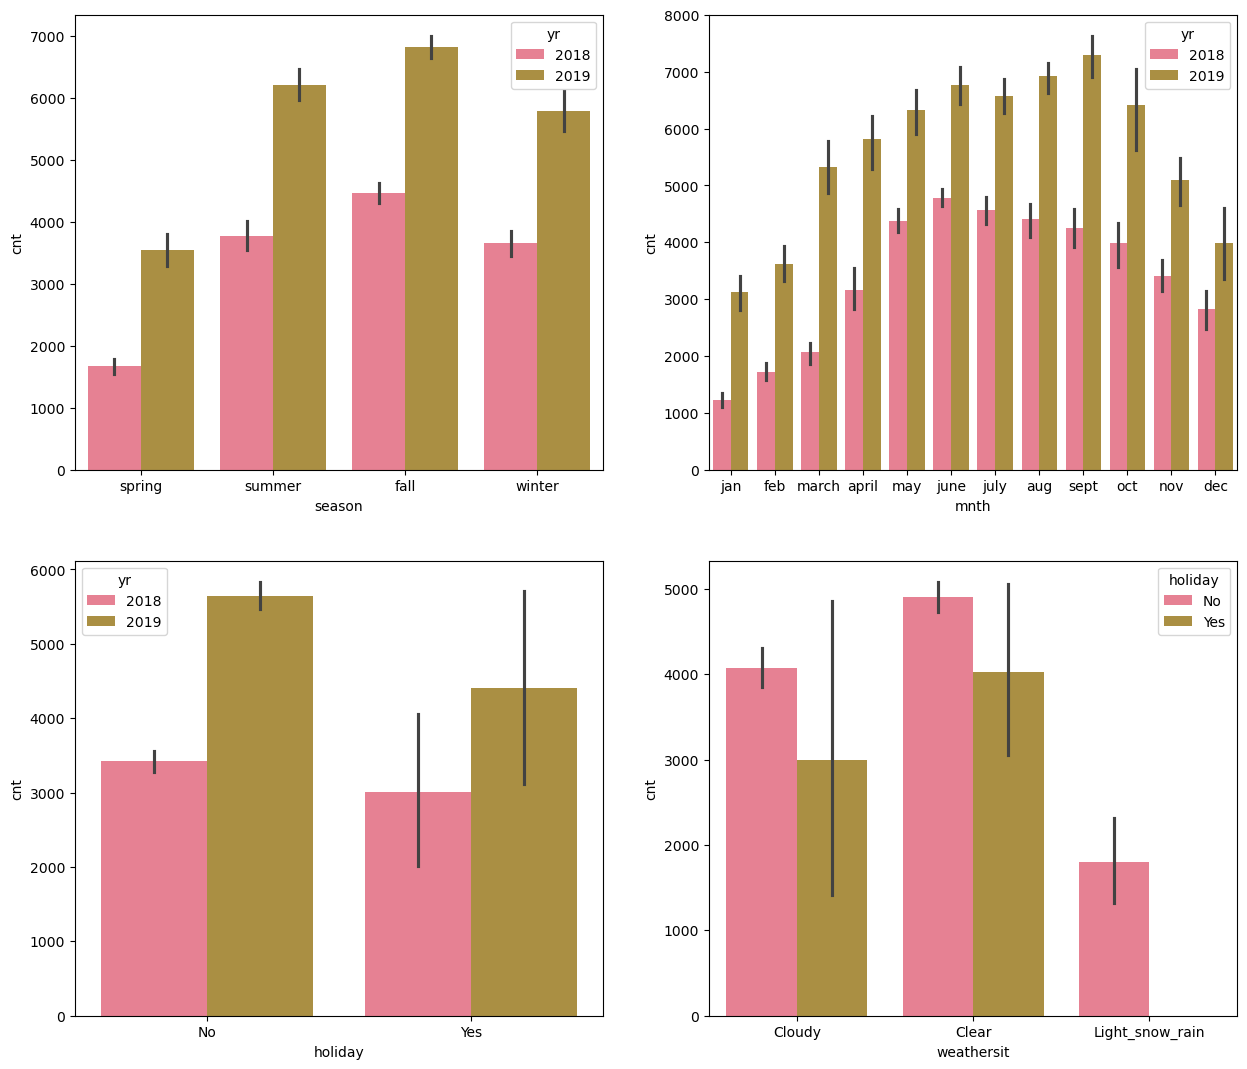

In [21]:
colors = sns.color_palette("husl")
plt.figure(figsize = (15,13))
plt.subplot(2,2,1)
sns.barplot(data = df , x = 'season', y= 'cnt',hue = 'yr', palette=colors)
plt.subplot(2,2,2)
sns.barplot(data = df , x = 'mnth', y= 'cnt',hue = 'yr',palette=colors)
plt.subplot(2,2,3)
sns.barplot(data = df , x = 'holiday', y= 'cnt',hue = 'yr',palette=colors)
plt.subplot(2,2,4)
sns.barplot(data = df , x = 'weathersit', y= 'cnt',hue = 'holiday',palette=colors)
plt.show()

1.From the above graphs we can see that in both years 2018 and 2019 in fall season we are seeing the more value had been generated <br> 2. We are observing the linear increase in the sale of both year if we compared it to month wise <br> 3. If there is no holiday then we are observing the sales greater than holiday <br> 4. If there is no holiday and wheather is clear the people are buying more bike followed by No holiday and cloudy weather 

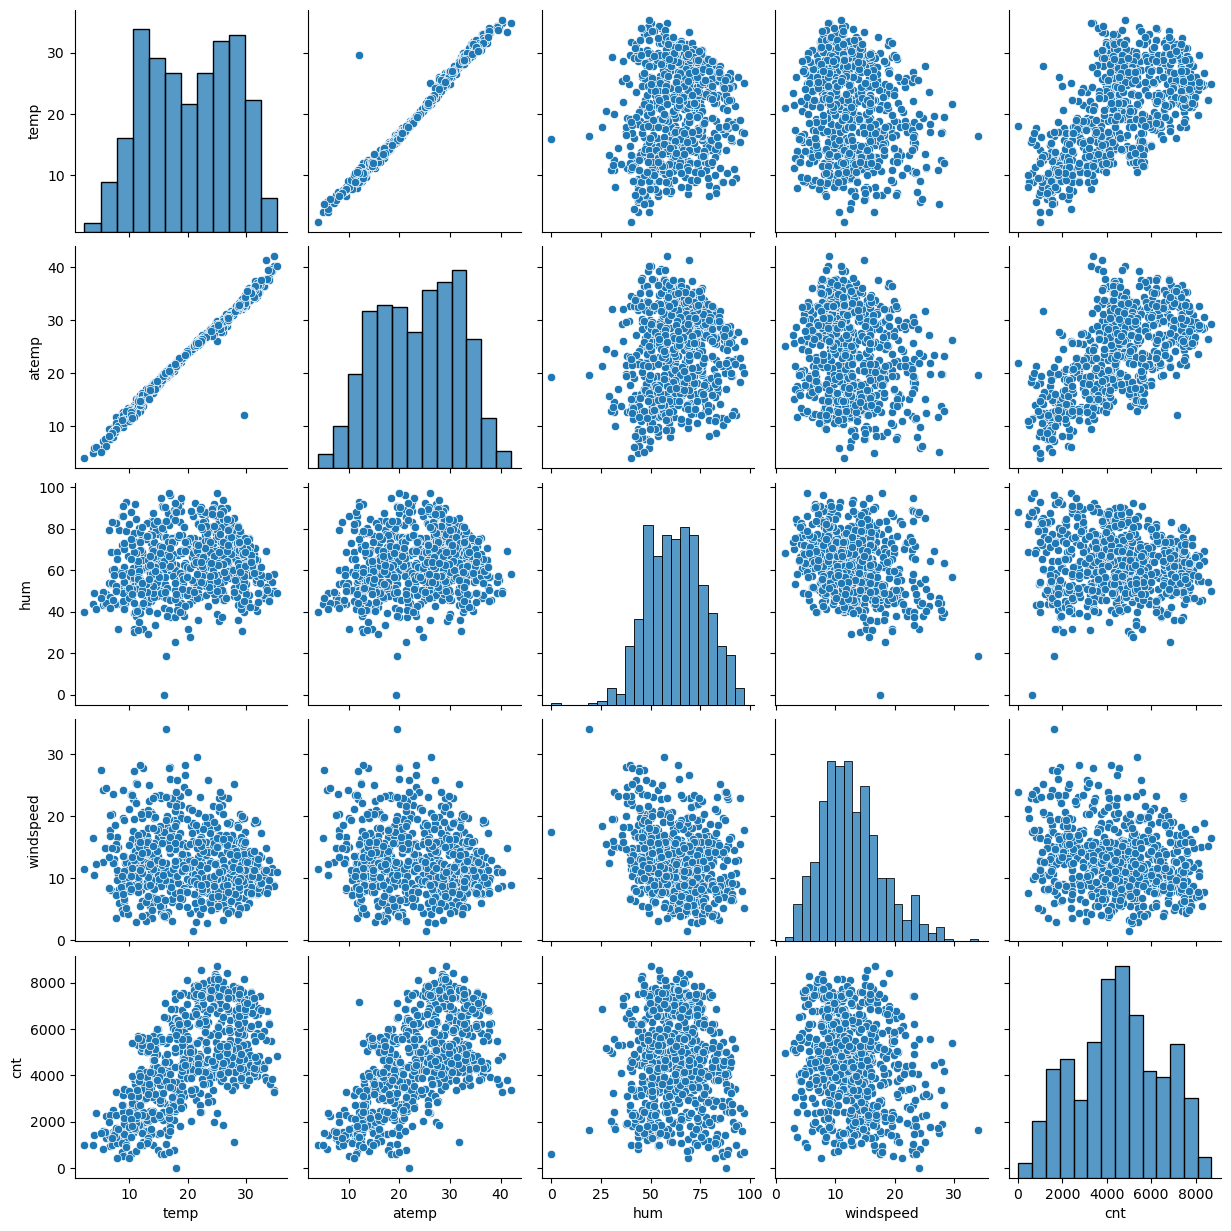

In [22]:
# creating the paiplot
sns.pairplot(df)
plt.show()

**By looking at the above pairplot we can say that we can build the linear regression model on the data set we have**

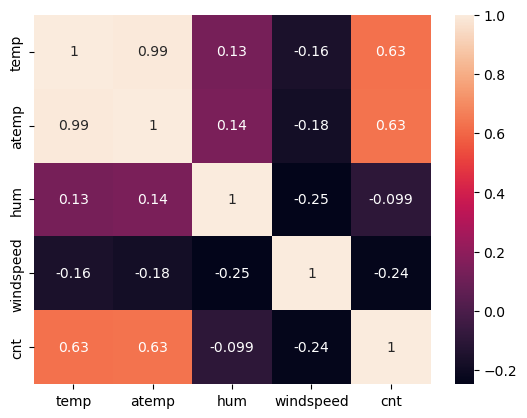

In [23]:
sns.heatmap(df[num].corr(),cmap = 'rocket',annot= True)
plt.show()

## Step 4 : Data Preparation

In [24]:
# Checking the data frame again
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,No,Sat,No,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,No,Sun,No,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,No,Mon,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,No,Tues,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,No,Wed,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# Checking the columns which has object data type
object = df.select_dtypes(include = 'object' ).columns
object

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

**Now we need to create the dummies for the above columns**

In [26]:
# Creating the dummy Variables

season_dummy = pd.get_dummies(df['season'],drop_first=True)
season_dummy = season_dummy.apply(lambda x : x.map({True:1 ,False:0}))

yr_dummy = pd.get_dummies(df['yr'],drop_first=True)
yr_dummy = yr_dummy.apply(lambda x : x.map({True:1 ,False:0}))

mnth_dummy = pd.get_dummies(df['mnth'],drop_first=True)
mnth_dummy = mnth_dummy.apply(lambda x : x.map({True:1 ,False:0}))

holiday_dummy = pd.get_dummies(df['holiday'],drop_first=True)
holiday_dummy = holiday_dummy.apply(lambda x : x.map({True:1 ,False:0}))

weekday_dummy = pd.get_dummies(df['weekday'],drop_first=True)
weekday_dummy = weekday_dummy.apply(lambda x : x.map({True:1 ,False:0}))

workingday_dummy = pd.get_dummies(df['workingday'],drop_first=True)
workingday_dummy = workingday_dummy.apply(lambda x : x.map({True:1 ,False:0}))

weathersit_dummy = pd.get_dummies(df['weathersit'],drop_first=True)
weathersit_dummy = weathersit_dummy.apply(lambda x : x.map({True:1 ,False:0}))

In [27]:
df.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,No,Sat,No,Cloudy,14.110847,18.18125,80.5833,10.749882,985


In [28]:
new_df = pd.concat([df,season_dummy,yr_dummy,mnth_dummy,holiday_dummy,weekday_dummy,workingday_dummy,weathersit_dummy],axis=1)
new_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Yes,Mon,Sat,Sun,Thurs,Tues,Wed,Workingday,Cloudy,Light_snow_rain
0,spring,2018,jan,No,Sat,No,Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,spring,2018,jan,No,Sun,No,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,spring,2018,jan,No,Mon,Workingday,Clear,8.050924,9.47025,43.7273,...,0,1,0,0,0,0,0,1,0,0
3,spring,2018,jan,No,Tues,Workingday,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,1,0,0
4,spring,2018,jan,No,Wed,Workingday,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,1,0,0


In [29]:
new_df = new_df.drop(columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit'],axis = 1)
new_df.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,aug,...,Yes,Mon,Sat,Sun,Thurs,Tues,Wed,Workingday,Cloudy,Light_snow_rain
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [30]:
# Checking the data type of new data frame
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             730 non-null    float64
 1   atemp            730 non-null    float64
 2   hum              730 non-null    float64
 3   windspeed        730 non-null    float64
 4   cnt              730 non-null    int64  
 5   spring           730 non-null    int64  
 6   summer           730 non-null    int64  
 7   winter           730 non-null    int64  
 8   2019             730 non-null    int64  
 9   aug              730 non-null    int64  
 10  dec              730 non-null    int64  
 11  feb              730 non-null    int64  
 12  jan              730 non-null    int64  
 13  july             730 non-null    int64  
 14  june             730 non-null    int64  
 15  march            730 non-null    int64  
 16  may              730 non-null    int64  
 17  nov             

## Step 5 : Model Building

In [31]:
# Dividing the data set into Train and test data set
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(new_df,train_size=0.7,random_state=100)

In [32]:
# Checking the size of data frames
print(new_df.shape)
print(train_df.shape)
print(test_df.shape)

(730, 30)
(510, 30)
(220, 30)


Now we have the following data bases : <br> **df** - Original data frame <br> **new_df** - Ddata frame after preparation <br> **train_df & test_df**

In [33]:
num

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [34]:
# scaling the variable with min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# apply the scaler to the columns we named it as num
train_df[num] = scaler.fit_transform(train_df[num])
train_df.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,aug,...,Yes,Mon,Sat,Sun,Thurs,Tues,Wed,Workingday,Cloudy,Light_snow_rain
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [35]:
# checking whether applied min max scaler is correct or not
train_df.describe()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,aug,...,Yes,Mon,Sat,Sun,Thurs,Tues,Wed,Workingday,Cloudy,Light_snow_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,...,0.025490,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.676471,0.345098,0.029412
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,...,0.157763,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.468282,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Dividing the train data set into X and y for the training purpose
y_train = train_df.pop('cnt')
X_train = train_df

In [37]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


### RFE : Recursive feature elimination

In [38]:
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running the rfe with the output variable equals to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
# Apply RFE with 15 selected features
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE model
rfe = rfe.fit(X_train, y_train)

In [41]:
# we will create the list of the rfe columns :
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', '2019', 'jan',
       'july', 'sept', 'Yes', 'Sat', 'Workingday', 'Cloudy',
       'Light_snow_rain'],
      dtype='object')

In [42]:
# X_train after RFE
X_train = X_train[rfe_columns]
X_train.shape

(510, 15)

### Model 1 :

Now we have 15 columns but from the further we will eliminate the columns by the **mannual methods**, so for that we are taking the help of **stats model** and we are comparing the **P-value** of the columns and at the same time we are Considering the **VIP** of that column

In [43]:
# importing the statsmodels for statistical analysis
import statsmodels.api as sm

In [44]:
# importing the Library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# bulding the linear regeression model-1
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())
# VIF for the model lm
vif = pd.DataFrame()
X = X_train
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' ,ascending= False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.22e-191
Time:                        17:59:52   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036     

Now, from the above you can see that the P- value less than 0.05 so wee will look at the VIF value <br> From the VIF we can obsrve that the **spring** column has the VIF value greater than 5..so We will remove that add build the column again

In [46]:
X_train = X_train.drop(columns = ['spring'], axis = 1 )

### Model 2 :

In [47]:
# bulding the linear regeression model-1
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())
# VIF for the model lm
vif = pd.DataFrame()
X = X_train
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' ,ascending= False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.98e-191
Time:                        17:59:52   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2011      0.030     

From the above model we can see that : <br> R-squared:                       **0.846** <br> Adj. R-squared:                  **0.842** <br> Every Column has p-values **less than 0.05** and the VIF values of the columns are also **less than 5**

## Step 6 : Residual Analysis of the Model

#### So, now to check if the error terms are also normally distributed ( which is one of the major assumptions of the Linear Regression), let us plot the histogram of the error term and see what it looks like

In [48]:
X_train_pred = lm.predict(X_train)
# Importing the required libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

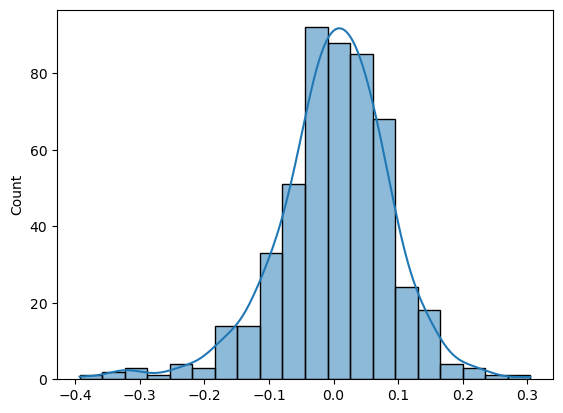

In [49]:
# Histogram of the error
error = y_train - X_train_pred
sns.histplot(error, bins =20,kde = True )
plt.show()

**From the above we can validate our assumption**

## Step 7 : Making the Prediction on the Test Data set :

In [50]:
# We have the data set 
test_df.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,aug,...,Yes,Mon,Sat,Sun,Thurs,Tues,Wed,Workingday,Cloudy,Light_snow_rain
184,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
221,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
152,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [51]:
# Checking the shape of the test data set
test_df.shape

(220, 30)

**Scaling the Test Variable**

In [52]:
num

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [53]:
test_df.describe()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,aug,...,Yes,Mon,Sat,Sun,Thurs,Tues,Wed,Workingday,Cloudy,Light_snow_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,0.236364,0.481818,0.059091,...,0.036364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.700000,0.318182,0.027273
std,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,0.425817,0.500809,0.236333,...,0.187620,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.459303,0.466833,0.163248
min,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
test_df[num] = scaler.transform(test_df[num])

In [55]:
test_df.describe()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,aug,...,Yes,Mon,Sat,Sun,Thurs,Tues,Wed,Workingday,Cloudy,Light_snow_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,...,0.036364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.700000,0.318182,0.027273
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,...,0.187620,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.459303,0.466833,0.163248
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# Dividing into X_test and y_test
y_test = test_df.pop('cnt')
X_test = test_df

In [57]:
print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


**Lets make prediction**

In [58]:
# Add the Constat to the X_test
X_test = sm.add_constant(X_test)

In [59]:
X_test = X_test[X_train.columns]

In [60]:
X_train.shape

(510, 15)

In [61]:
# Make prediction on the X_test data set
Test_pred = lm.predict(X_test)

In [62]:
Test_pred.shape

(220,)

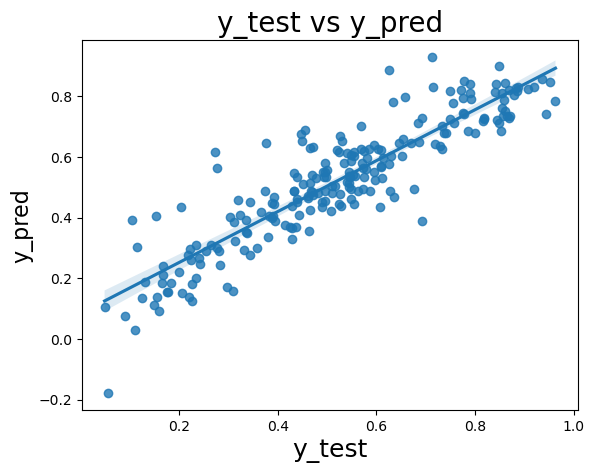

In [63]:
sns.regplot( x = y_test , y = Test_pred)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error  # Import the missing function

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, Test_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)  

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.09647343138843396


In [65]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Test_pred)
print('R2 Score is' , r2)

R2 Score is 0.8053484636863372
